# **Importing Necessary Libs**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score,silhouette_samples, adjusted_rand_score, davies_bouldin_score
from sklearn.decomposition import PCA

# **Loading Data**

In [ ]:
data = np.genfromtxt("https://hastie.su.domains/Papers/LARS/diabetes.data",skip_header = 1)

# **Reading and understanding the data**

In [ ]:
df = pd.DataFrame(data)

df.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'y']

print(df.head())

    age  sex   bmi     bp     s1     s2    s3   s4      s5    s6      y
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0  151.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0   75.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0  141.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0  206.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0  135.0


In [ ]:
df.shape

(442, 11)

#About the dataset

Data Characteristics:

The dataset contains 442 observations (patients)

The variables are a mix of continuous (e.g., age, bmi, bp) and categorical (e.g., sex) data types


# Data Dictionary:

The dataset consists of 10 variables and Y as target variable that measures the progression of diabetes, which are:

age: Age of the patient

sex: Sex of the patient (male or female)

bmi: Body Mass Index (BMI) of the patient

bp: Blood pressure of the patient

s1, s2, s3, s4, s5, s6: Six blood serum measurements

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  y       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


there are no object datatypes , so it is easier for us to process the data further without converting !

In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


# Limitations :

1.Inadequate representation: The survey mostly involves middle-aged participants, lacking representation from younger generations. This limits the dataset's breadth and may skew findings. Including a diverse age range, especially younger individuals, would provide a more comprehensive understanding.


2.Missing important factors : pregnancies ,glucose ,insulin ,genetics - other datasets have fairly simpler measurements than the blood serum values .


3.Data type of gender is Numeric .

# **Performing EDA**

# Finding ambiguous values (missing values,Nan values ,infinite values)

In [ ]:
df.shape

(442, 11)

In [ ]:
print(np.isfinite(data).sum())

4862


here it is showing that dataset has 4862 finite values. we can conclude that there are no null values since 4862 = 442*11  

In [ ]:
  missing_values = df.isnull().sum()
  print("Missing Values:\n", missing_values)

Missing Values:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
y      0
dtype: int64


there are 0 null values in our dataset , hence we did not need to fill any records .

# VISUALIZING & HANDLING THE OUTLIERS :

In [ ]:
# Access the quantile method using dot notation
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the inter Quartile range (IQR)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

# Print the number of outliers
print("\nOutliers in each colummn: ")
print(outliers)



Outliers in each colummn: 
age    0
sex    0
bmi    3
bp     0
s1     8
s2     7
s3     7
s4     2
s5     4
s6     9
y      0
dtype: int64


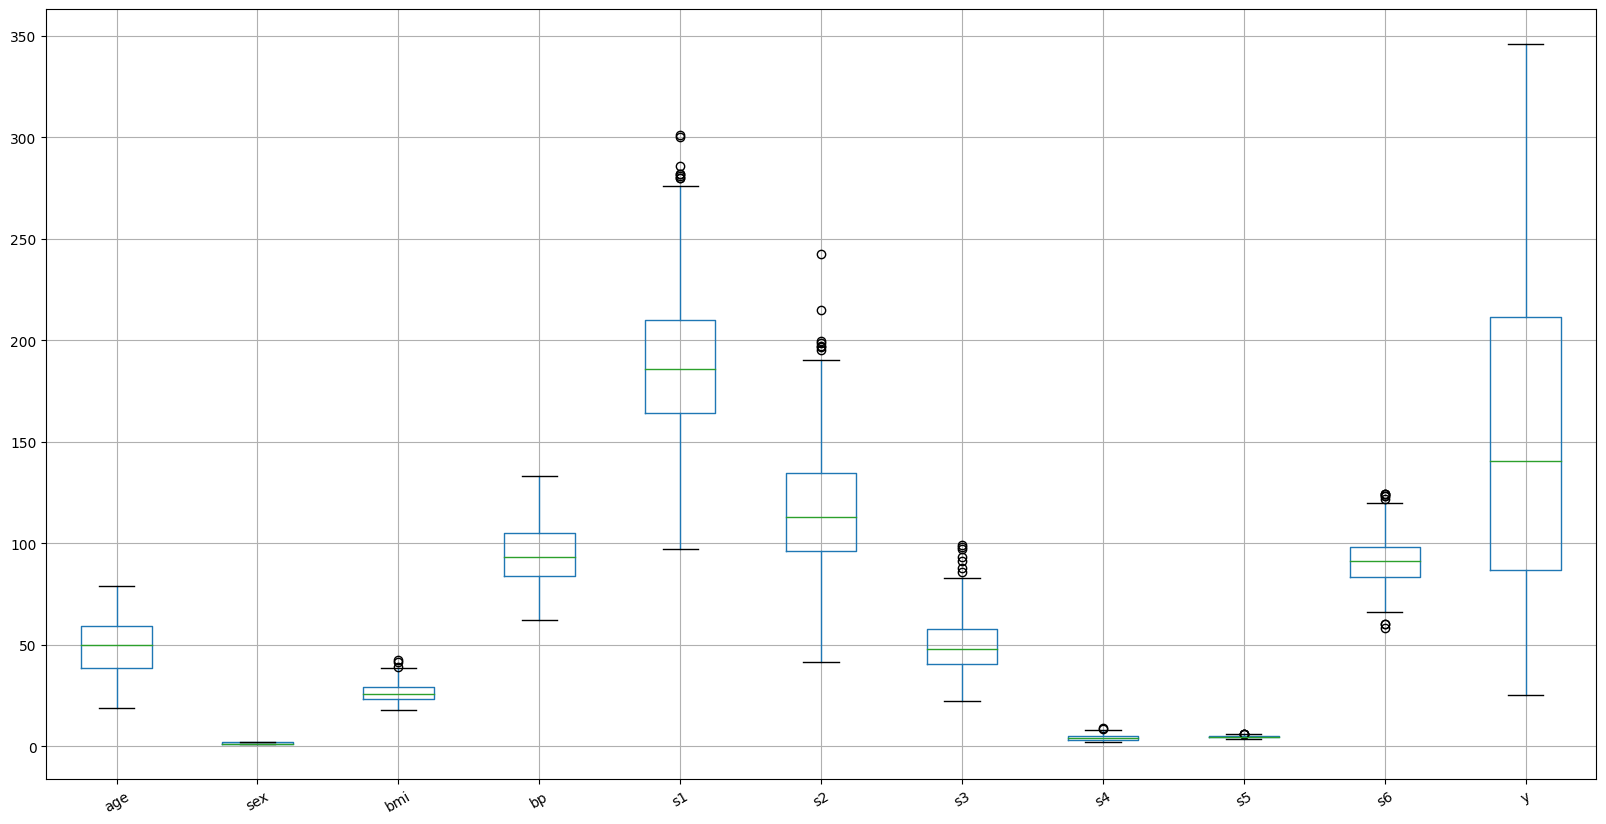

In [ ]:
df.boxplot(figsize=(20,10))
plt.xticks(rotation=30)
plt.show()

# following simple imputation method : replacing outliers using mean values - to handle the outliers

In [ ]:
#handle the outliers in dataset

# Replacing outliers with mean
def replace_outliers_with_mean(df):
    for column in df.columns:
        # Calculate Q1, Q3 and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Replace outliers with mean
        df[column] = df[column].apply(lambda x: df[column].mean() if (x < (Q1 - 1.5 * IQR)) or (x > (Q3 + 1.5 * IQR)) else x)
    return df

df = replace_outliers_with_mean(df)

# Check for outliers again
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers after replacing with mean: ")
print(outliers)



Outliers after replacing with mean: 
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
y      0
dtype: int64


In [ ]:
# def analyze_outliers_impact(df, column, num_outliers):
#   """
#   Analyzes how central tendency measures (mean, median, mode) are affected by outliers in a given column.

#   Args:
#     df: The pandas DataFrame.
#     column: The name of the column to analyze.
#     num_outliers: The number of outliers to introduce.
#   """
#   original_mean = df[column].mean()
#   original_median = df[column].median()
#   # For mode, we'll consider the most frequent value
#   try:
#     original_mode = df[column].mode()[0]
#   except IndexError:
#     original_mode = "No mode"

#   # Introduce artificial outliers
#   df_with_1outliers = df.copy()
#   for _ in range(num_outliers):
#     df_with_1outliers.loc[df_with_1outliers[column].idxmax(), column] = df_with_1outliers[column].max() * 2

#   outlier1_mean = df_with_1outliers[column].mean()
#   outlier1_median = df_with_1outliers[column].median()
#   try:
#     outlier1_mode = df_with_1outliers[column].mode()[0]
#   except IndexError:
#     outlier1_mode = "No mode"

#   change_in_mean = outlier1_mean - original_mean
#   change_in_median = outlier1_median - original_median
#   change_in_mode = outlier1_mode - original_mode

#   # Print the results

#   print(f"Analyzing column: {column} with {num_outliers} outliers")
#   print("Original Mean:", original_mean)
#   print("Outlier Mean:", outlier1_mean)
#   print("Change in Mean:", round(change_in_mean,3))
#   print("\nOriginal Median:", original_median)
#   print("Outlier Median:", outlier1_median)
#   print("Change in Median:", round(change_in_median,2))
#   print("\nOriginal Mode:", original_mode)
#   print("Outlier Mode:", outlier1_mode)
#   print("Change in Mode:", round(change_in_mode,3))
#   print("-" * 40)


# # Analyze the impact of ONE outliers on different columns
# for column in df.columns:
#     analyze_outliers_impact(df, column, 1)

In [ ]:
# def analyze_outliers_impact(df, column, num_outliers):
#   original_mean = df[column].mean()
#   original_median = df[column].median()
#   # For mode, we'll consider the most frequent value
#   try:
#     original_mode = df[column].mode()[0]
#   except IndexError:
#     original_mode = "No mode"

#   # Introduce artificial outliers
#   df_with_2outliers = df.copy()
#   for _ in range(num_outliers):
#     df_with_2outliers.loc[df_with_2outliers[column].idxmax(), column] = df_with_2outliers[column].max() * 2

#   outlier2_mean = df_with_2outliers[column].mean()
#   outlier2_median = df_with_2outliers[column].median()
#   try:
#     outlier2_mode = df_with_2outliers[column].mode()[0]
#   except IndexError:
#     outlier2_mode = "No mode"

#   change_in_mean = outlier2_mean - original_mean
#   change_in_median = outlier2_median - original_median
#   change_in_mode = outlier2_mode - original_mode

#   # Print the results

#   print(f"Analyzing column: {column} with {num_outliers} outliers")
#   print("Original Mean:", original_mean)
#   print("Outlier Mean:", outlier2_mean)
#   print("Change in Mean:", round(change_in_mean,3))
#   print("\nOriginal Median:", original_median)
#   print("Outlier Median:", outlier2_median)
#   print("Change in Median:", round(change_in_median,2))
#   print("\nOriginal Mode:", original_mode)
#   print("Outlier Mode:", outlier2_mode)
#   print("Change in Mode:", round(change_in_mode,3))
#   print("-" * 40)


# # Analyze the impact of TWO outliers on different columns
# for column in df.columns:
#     analyze_outliers_impact(df, column, 2)

In [ ]:
# def analyze_outliers_impact(df, column, num_outliers):
#   original_mean = df[column].mean()
#   original_median = df[column].median()
#   # For mode, we'll consider the most frequent value
#   try:
#     original_mode = df[column].mode()[0]
#   except IndexError:
#     original_mode = "No mode"

#   # Introduce artificial outliers
#   df_with_5outliers = df.copy()
#   for _ in range(num_outliers):
#     df_with_5outliers.loc[df_with_5outliers[column].idxmax(), column] = df_with_5outliers[column].max() * 2

#   outlier5_mean = df_with_5outliers[column].mean()
#   outlier5_median = df_with_5outliers[column].median()
#   try:
#     outlier5_mode = df_with_5outliers[column].mode()[0]
#   except IndexError:
#     outlier5_mode = "No mode"

#   change_in_mean = outlier5_mean - original_mean
#   change_in_median = outlier5_median - original_median
#   change_in_mode = outlier5_mode - original_mode

#   # Print the results

#   print(f"Analyzing column: {column} with {num_outliers} outliers")
#   print("Original Mean:", original_mean)
#   print("Outlier Mean:", outlier5_mean)
#   print("Change in Mean:", round(change_in_mean,3))
#   print("\nOriginal Median:", original_median)
#   print("Outlier Median:", outlier5_median)
#   print("Change in Median:", round(change_in_median,2))
#   print("\nOriginal Mode:", original_mode)
#   print("Outlier Mode:", outlier5_mode)
#   print("Change in Mode:", round(change_in_mode,3))
#   print("-" * 40)


# # Analyze the impact of FIVE outliers on different columns
# for column in df.columns:
#    analyze_outliers_impact(df, column, 5)

TABULATION OF RESULTS :

I have commented out the code just so that those inserted outliers dont get in the way of my further processing .

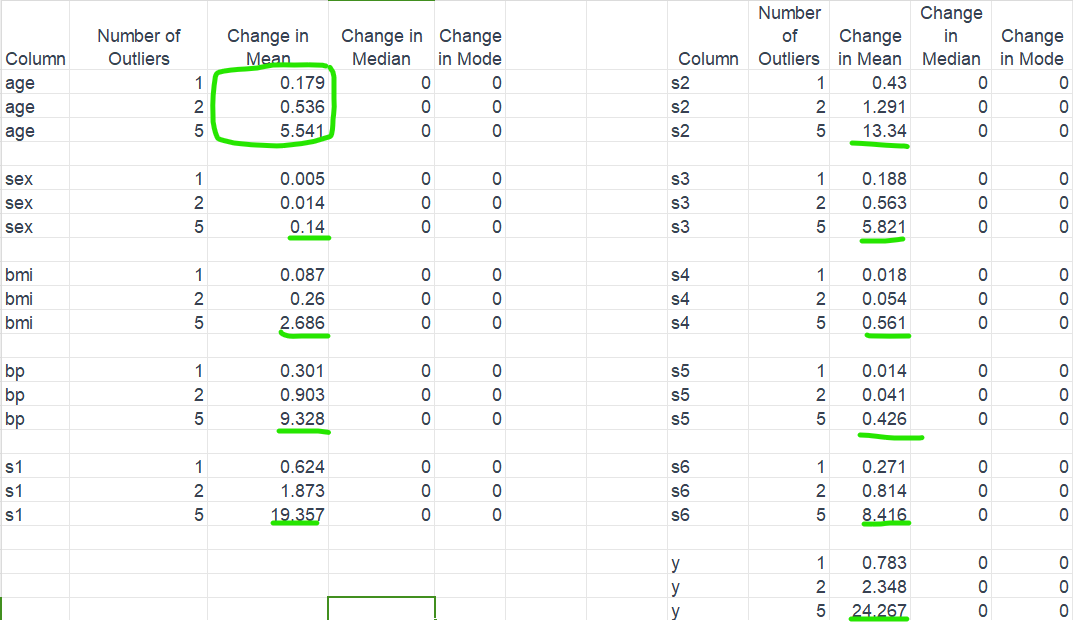

# General Observations about the impact of OUTLIERS on CENTRAL TENDENCY MEASURES

1.In most cases, the ***median and mode remain unchanged*** even after removinG
outliers, indicating that they are more robust to outliers compared to the mean.


2.The ***mean is more sensitive to outliers***, and its value changes significantly when outliers are removed.

# Column-wise Observations

***age***: The ***mean increases significantly as the number of outliers increases***, indicating that the outliers are skewing the data towards higher values.


***sex***: The **mean changes are relatively small**, and the median and mode remain unchanged, suggesting that the outliers are not significantly affecting the distribution of sex.


***bmi, bp, s1, s2, s3, s4, s5, s6, and y***: In these columns, the ***mean changes are more pronounced*** as the number of outliers increases, indicating that the outliers are having a significant impact on the distribution of these variables.

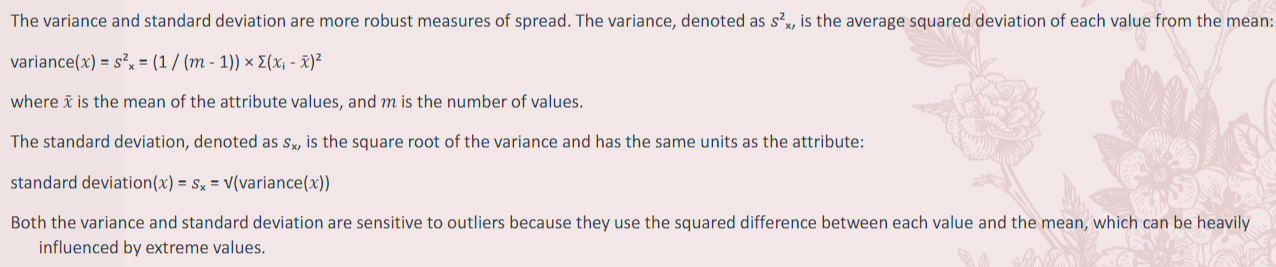

# Univariate Analysis:

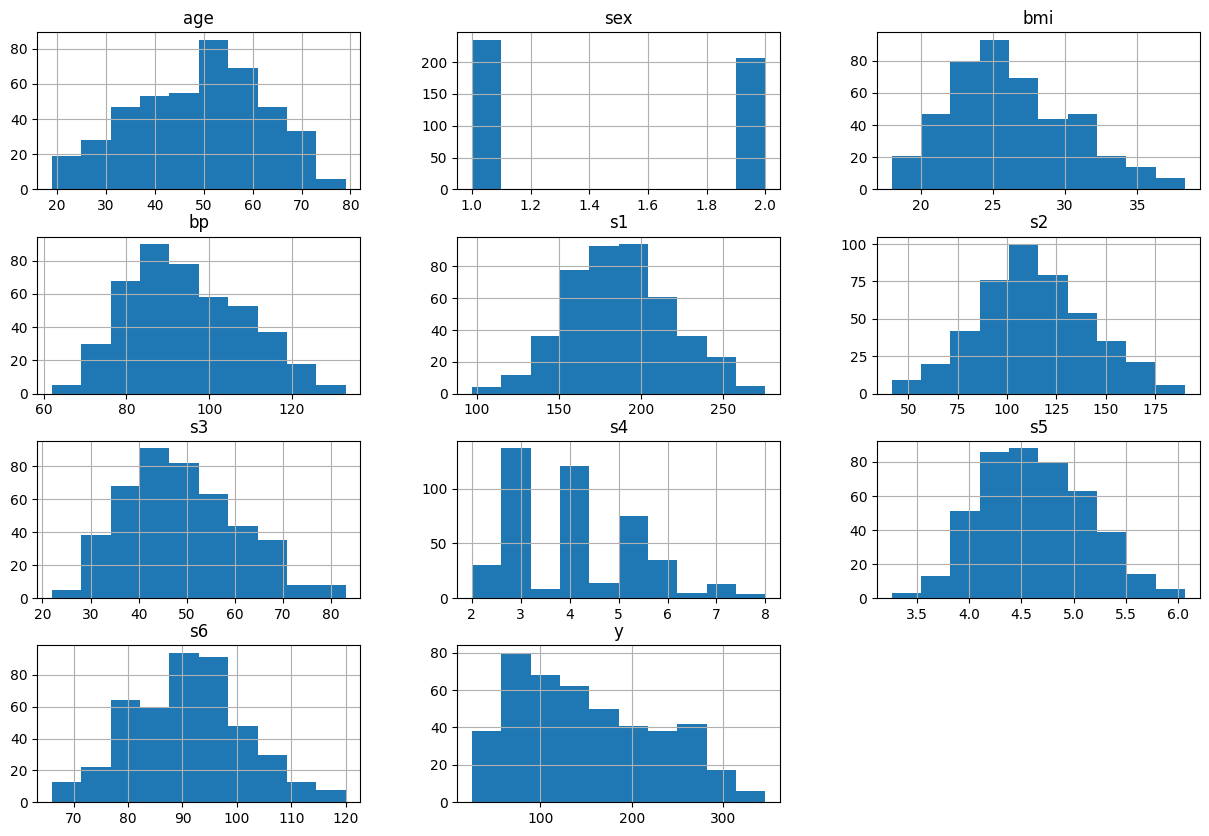

In [ ]:
# Create histograms for each variable
df.hist(figsize=(15, 10))
plt.show()


In [ ]:
# Create kernel density plots for each variable

#sns.kdeplot(data=df, fill=True)
#plt.show()


# Bivariate Analysis:

# ScatterPlot of the data where age and bmi are plotted wrt target variable = y

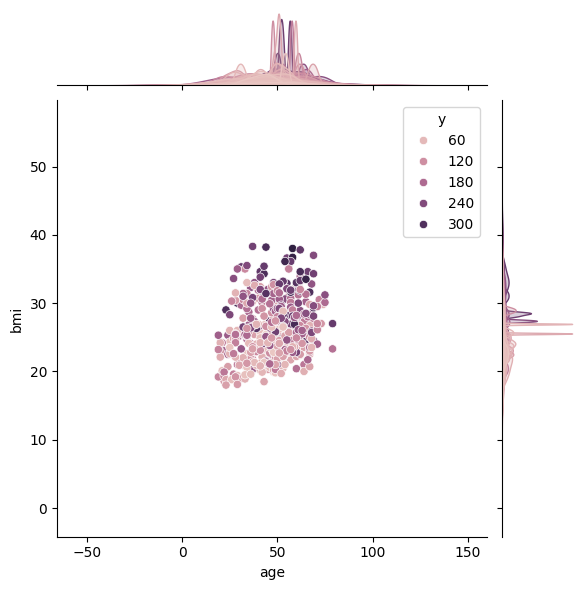

In [ ]:
# Create a scatter matrix for all the variables
sns.jointplot(x='age', y='bmi',hue= 'y' , kind = 'scatter', data=df)
plt.show()


# Heatmapping

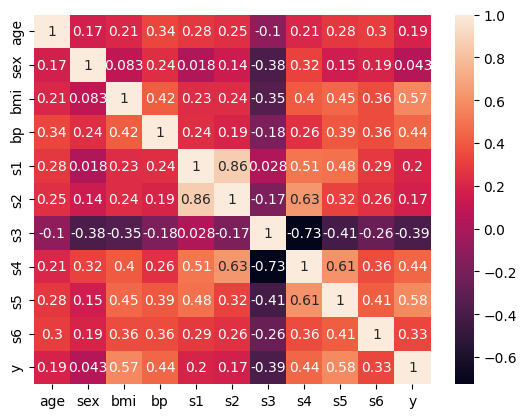

In [ ]:
# Calculate correlation coefficients
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix ,annot =True)
plt.show()


##Close to 1 indicates a very good relationship

##Close to -1 indicates a very poor relationship

# Calculating VIF

In [ ]:
# Identify any potential confounding variables that may influence the relationship between the variables.

# Calculate the variance inflation factor (VIF) for each variable
##from statsmodels.stats.outliers_influence import variance_inflation_factor

##vif = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Print the VIF values
##print("Variance Inflation Factors:")
##print(vif)

# Any VIF value greater than 10 indicates a potential multicollinearity problem.






##VIF measures the correlation among independent variables in a regression model. High VIF values indicate high multicollinearity, which can cause issues in regression analysis.

##the breakdown of the output:

##VIF for 'age': 18.22

##VIF for 'sex': 12.65

##VIF for 'bmi': 62.46

##VIF for 'bp': 72.95

##VIF for 's1': 255.95

##VIF for 's2': 123.50

##VIF for 's3': 45.83

##VIF for 's4': 66.51

##VIF for 's5': 204.32

##VIF for 's6': 94.32

##VIF for 'y' (target variable): 9.17


##High VIF values, especially above 10 or 20, suggest high multicollinearity and may indicate that some features are highly correlated with others.

##It's generally recommended to address multicollinearity by removing highly correlated features or using techniques like principal component analysis (PCA) to reduce dimensionality.


# **Scaling the data as required for plotting and further model training**

K-means is a distance-based algorithm, and scaling ensures that all features contribute equally to the distance calculations, leading to more accurate clustering results when features have different scales

In [ ]:
# Scale the features to decrease mean such that standard deviation is scaled to 1
#standard scaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('y', axis=1)), columns=df.drop('y', axis=1).columns)

In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.277438,94.647014,187.378104,113.998584,49.101853,4.049368,4.628183,91.041497,152.133484
std,13.109028,0.499561,4.250894,13.831283,31.959493,28.062668,11.689096,1.251998,0.503326,10.543920,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,66.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,84.000000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.130090,140.500000
75%,59.000000,2.000000,29.200000,105.000000,207.000000,132.150000,56.750000,5.000000,4.983600,98.000000,211.500000
max,79.000000,2.000000,38.300000,133.000000,276.000000,190.200000,83.000000,8.000000,6.068400,120.000000,346.000000


In [ ]:
df_scaled.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,8.037814e-18,1.607563e-16,-3.215126e-16,1.060991e-15,-5.264768e-16,-2.130021e-16,1.929075e-16,4.822688e-17,2.226474e-15,-8.359326e-16
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.949429e+00,-2.363050e+00,-2.831100e+00,-2.582813e+00,-2.321186e+00,-1.638732e+00,-2.725142e+00,-2.377661e+00
25%,-7.841722e-01,-9.385367e-01,-7.247711e-01,-7.706500e-01,-7.244893e-01,-6.403141e-01,-7.581325e-01,-8.391039e-01,-6.991116e-01,-6.685820e-01
50%,1.131724e-01,-9.385367e-01,-1.359930e-01,-1.192138e-01,-4.316921e-02,-3.562438e-02,-9.437018e-02,-3.947576e-02,-1.617663e-02,8.411861e-03
75%,8.005001e-01,1.065488e+00,6.882963e-01,7.493678e-01,6.146571e-01,6.475501e-01,6.550390e-01,7.601524e-01,7.069369e-01,6.607019e-01
max,2.327895e+00,1.065488e+00,2.831448e+00,2.776058e+00,2.776086e+00,2.718479e+00,2.903266e+00,3.159037e+00,2.864642e+00,2.749577e+00


#the std deviation is scaled to 1 in the df_scaled

##there is a significant change in the statistics of the scaled dataset as compared to the original dataset :

# K means clustering:


# ELBOW METHOD

# K-Means is an unsupervised clustering algorithm that groups similar data samples in one group away from dissimilar data samples. Precisely, it aims to minimize the Within-Cluster Sum of Squares (WCSS) and consequently maximize the Between-Cluster Sum of Squares (BCSS).

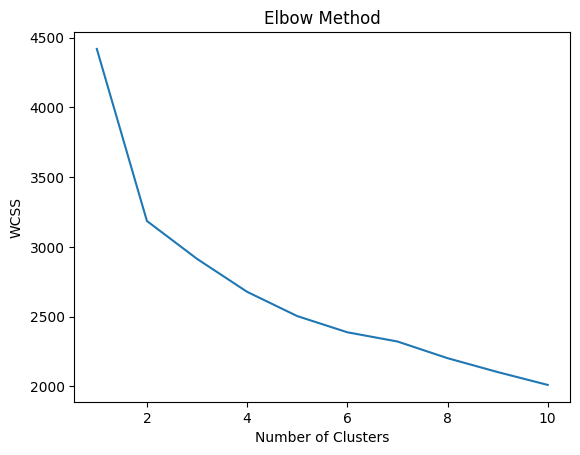

In [ ]:
# Implement the K-means clustering algorithm
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)     ##k means
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

we can observe an ELBOW @ K = 2 !!

Before i can conclude that k = 2 is the optimal value , i want to go ahead and cross check with silhouette score metric as well because elbow method is fairly subjective and the latter metric is more practical hence more accurate .

# Finding the optimal k value for which silhouette score is highest

The silhouette score measures how well-separated and dense clusters are, and how similar an object is to its own cluster compared to other clusters

Silhouette score for k=2: 0.23656356597415448
Silhouette score for k=3: 0.15236480085213308
Silhouette score for k=4: 0.14532387359150448
Silhouette score for k=5: 0.1450836031955486
Silhouette score for k=6: 0.1308617569221554
Silhouette score for k=7: 0.13001521851932782
Silhouette score for k=8: 0.12857532112659664
Silhouette score for k=9: 0.1284633286346186
Silhouette score for k=10: 0.13200364014753074


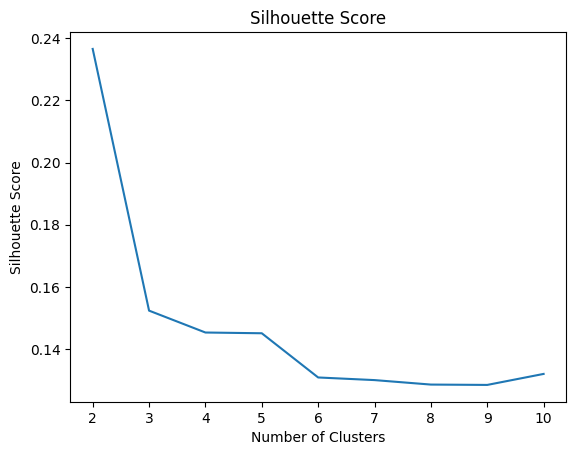

In [ ]:
# Silhouette Score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, clusters)
    silhouette_scores.append(score)
    print(f'Silhouette score for k={i}: {score}')

# Visualize the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# plotting the SILHOUETTE DIAGRAM AND GIVING A RED LINE FOR MEAN SILHOUETTE SCORE !!

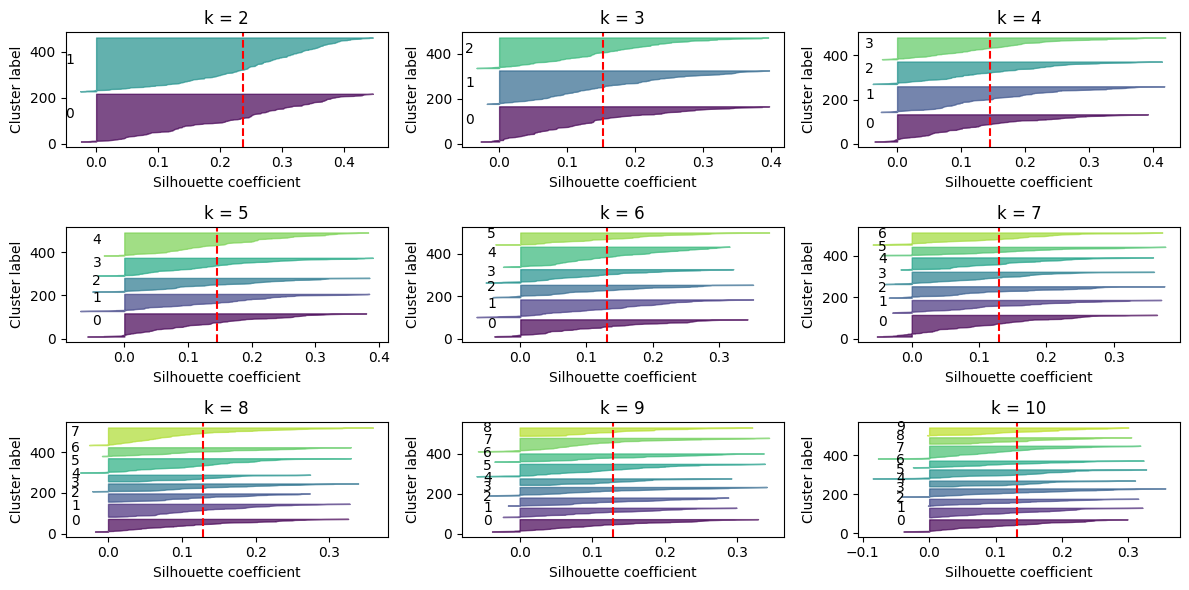

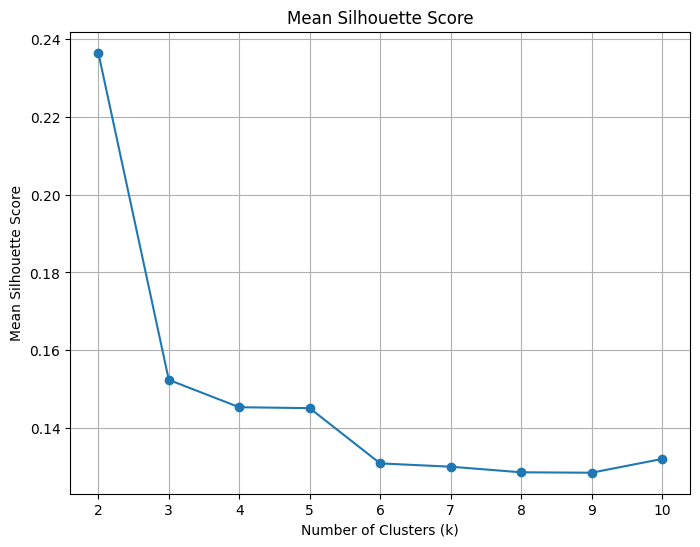

In [ ]:
# Initialize a list to store silhouette scores
silhouette_scores = []

# Specify the range of k values to test
k_values = range(2, 11)  # We start from 2 clusters since silhouette score requires at least 2 clusters

# Create subplots for each value of k
plt.figure(figsize=(12, 6))
for i, k in enumerate(k_values, start=1):
    ax = plt.subplot(3, 3, i)

    # Fit KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)

    # Calculate silhouette scores for each sample
    silhouette_values = silhouette_samples(df_scaled, kmeans.labels_)
    silhouette_scores.append(np.mean(silhouette_values))

    # Sort silhouette values for plotting
    silhouette_values.sort()

    # Plot silhouette diagram
    y_lower = 10
    for j in range(k):
        cluster_silhouette_values = silhouette_values[kmeans.labels_ == j]
        cluster_silhouette_values.sort()

        size_cluster_j = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.viridis(float(j) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    ax.set_title(f'k = {k}')
    ax.set_xlabel('Silhouette coefficient')
    ax.set_ylabel('Cluster label')

    # Add vertical dashed line for mean silhouette score
    ax.axvline(x=np.mean(silhouette_values), color="red", linestyle="--")

plt.tight_layout()

# Plot mean silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Mean Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Mean Silhouette Score')
plt.grid(True)

plt.show()

# Clustering with the optimal k value

# ***HYPER PARA TUNING WITH K =2 ***

In [ ]:
# TRAINING the KMeans model with the optimal number of clusters =  2 !
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# Step 3: Once you have determined the optimal k value, apply the K-means algorithm with that k value

best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because silhouette_scores start from k=2
print(f'Best k value: {best_k}')

kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

Best k value: 2


# plotting for OPTIMAL VALUE OF K=2

---



Just to have a closer look ..

BEST K VALUE = 2 FOR OUR MODEL !

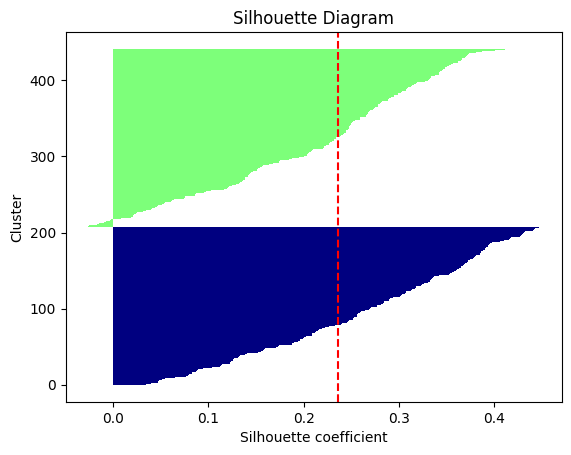

In [ ]:
# plot silhoutte diagram and mean silhoutte score

from sklearn.metrics import silhouette_samples

# Calculate the silhouette scores for each sample
silhouette_values = silhouette_samples(df_scaled, kmeans.labels_)

# Plot the silhouette diagram
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, cluster in enumerate(np.unique(kmeans.labels_)):
    cluster_silhouette_values = silhouette_values[kmeans.labels_ == cluster]
    cluster_silhouette_values.sort()
    y_ax_upper += len(cluster_silhouette_values)
    color = plt.cm.jet(float(i) / kmeans.n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), cluster_silhouette_values, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(cluster_silhouette_values)

# Add the vertical line for the average silhouette score of all samples
plt.axvline(np.mean(silhouette_values), color='red', linestyle='--')

# Set the y-axis labels and title
plt.yticks(None)   ##use None to automatically generate yticks ?????
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Diagram')
plt.show()



# Visualizing of the clusters with optimal k value

# PERFORMED PCA FOR ORIGINAL DATASET : HIGH DIMENSIONAL DATA and performed PCA ON SCALED DATATSET : LOW DIMENSIONAL DATA

# PCA: for dimensioanlity reduction

how does pca work ?


Yes, Principal Component Analysis (PCA) is indeed considered a dimensionality reduction technique. PCA is a widely used method for reducing the number of variables in a dataset while preserving most of the information present in the data.

Here's how PCA achieves dimensionality reduction:

Orthogonal Transformation: PCA transforms the original variables (features) into a new set of variables, called principal components, which are linear combinations of the original variables. These principal components are orthogonal to each other, meaning they are uncorrelated.
Variance Maximization: PCA identifies the directions (principal components) in the feature space along which the data varies the most. The first principal component captures the most significant amount of variance in the data, followed by the second principal component, and so on.
Dimension Reduction: By retaining only a subset of the principal components that explain the majority of the variance in the data, PCA effectively reduces the dimensionality of the dataset. The number of principal components retained determines the level of dimensionality reduction achieved.
Information Retention: Despite reducing the dimensionality, PCA strives to retain as much information as possible from the original dataset. The retained principal components capture the most important patterns and structures present in the data.
PCA is commonly used for various purposes, including data visualization, noise reduction, feature extraction, and speeding up machine learning algorithms by reducing the computational complexity associated with high-dimensional data.

In summary, PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving essential information and capturing the underlying structure of the data.







In [ ]:
# Step 4: Visualize the clusters using appropriate plots

# PCA for visualization

from sklearn.decomposition import PCA

# PCA on the original dataset
pca_original = PCA(n_components=2)
pca_df_original = pd.DataFrame(pca_original.fit_transform(df), columns=['PC1', 'PC2'])

# PCA on the scaled dataset
pca_scaled = PCA(n_components=2)
pca_df_scaled = pd.DataFrame(pca_scaled.fit_transform(df_scaled), columns=['PC1', 'PC2'])


# Visualize clusters on the original dataset:



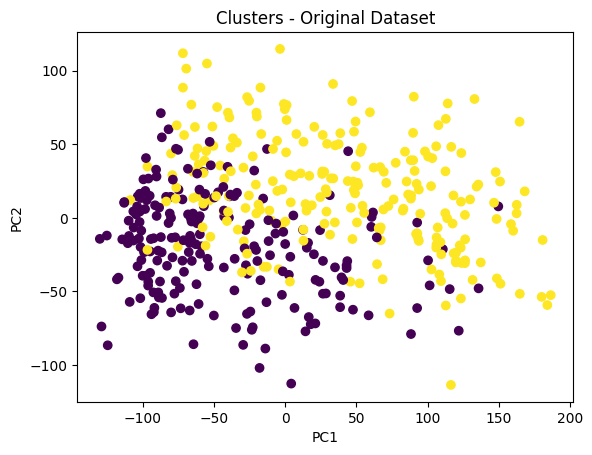

In [ ]:
plt.scatter(pca_df_original['PC1'], pca_df_original['PC2'], c=clusters)
plt.title('Clusters - Original Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# Visualize clusters on the scaled dataset :




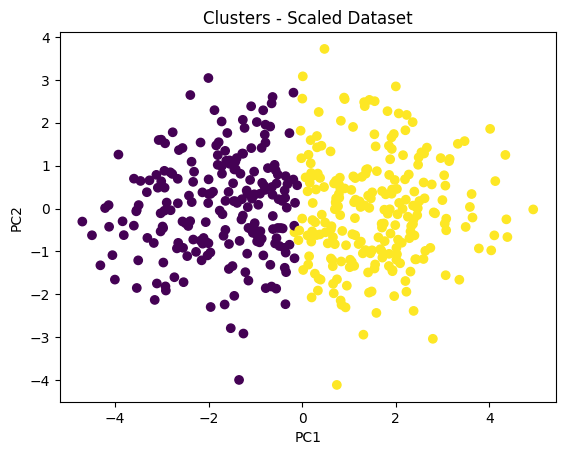

In [ ]:
plt.scatter(pca_df_scaled['PC1'], pca_df_scaled['PC2'], c=clusters)
plt.title('Clusters - Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


we can see that there are 2 clusters for the target variable Y : one cluster being Yes diabetes and the other is No Diabetes .

 the clusters are well seperated after PCA !

EVALUATING THE METRICS OF K MEANS CLUSTERING :

In [ ]:
# Step 5: Evaluate the accuracy of the K-means model

# Internal validation metrics
best_silhouette_score = silhouette_score(df_scaled, clusters)
print(f'Best Silhouette Score: {best_silhouette_score} (k={best_k})')

# External validation metrics (if ground truth labels are available)
ground_truth_labels = None  # Replace None with actual ground truth labels if available
if ground_truth_labels is not None:
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    accuracy = accuracy_score(ground_truth_labels, clusters)
    precision = precision_score(ground_truth_labels, clusters)
    recall = recall_score(ground_truth_labels, clusters)
    f1 = f1_score(ground_truth_labels, clusters)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
else :
    print("External validation metrics cannot be calculated as ground truth labels are not available.")

Best Silhouette Score: 0.23656356597415448 (k=2)
External validation metrics cannot be calculated as ground truth labels are not available.


# **`PREDICTING DIABETES ON NEW DATA`**

In [ ]:
 ##giving new data and see if the model predicts the output as diabetes or no diabetes

new_data = np.array([[50, 1, 30, 120, 100, 50, 20, 30, 40, 50]])
new_data_scaled = scaler.transform(new_data)
prediction = kmeans.predict(new_data_scaled)
if prediction == 0:
    print("No diabetes")
else:
    print("Diabetes")


Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
# Function to generate random data within specified ranges
def generate_random_data():
    age = np.random.randint(19, 80) ##used the min and mx values from the statistical analysis of my dataset
    sex = np.random.choice([1.0, 2.0])
    bmi = np.random.uniform(18, 42)
    bp = np.random.randint(62, 134)
    s1 = np.random.randint(97, 302)
    s2 = np.random.randint(41, 244)
    s3 = np.random.randint(22, 100)
    s4 = np.random.randint(2, 11)
    s5 = np.random.randint(3, 8)
    s6 = np.random.randint(58, 125)
    return np.array([[age, sex, bmi, bp, s1, s2, s3, s4, s5, s6]])

num_samples = 5

for _ in range(num_samples):
    # Generate random data
    new_data = generate_random_data()
    print("Generated Data:", ', '.join(map(str, new_data[0])))

    new_data_scaled = scaler.transform(new_data)
    prediction = kmeans.predict(new_data_scaled)

    # Check prediction
    if prediction == 0:
        print("Output: No diabetes")
    else:
        print("Output: Diabetes")

Generated Data: 60.0, 2.0, 26.676904525121756, 70.0, 191.0, 188.0, 22.0, 4.0, 6.0, 107.0
Output: Diabetes
Generated Data: 42.0, 2.0, 41.739007361268335, 62.0, 280.0, 218.0, 77.0, 9.0, 6.0, 85.0
Output: Diabetes
Generated Data: 64.0, 1.0, 21.234665219456833, 81.0, 204.0, 75.0, 60.0, 4.0, 5.0, 108.0
Output: No diabetes
Generated Data: 26.0, 2.0, 40.26420892555787, 98.0, 202.0, 119.0, 50.0, 5.0, 7.0, 119.0
Output: Diabetes
Generated Data: 65.0, 2.0, 32.79067019411198, 113.0, 105.0, 149.0, 98.0, 5.0, 7.0, 93.0
Output: Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitte

# week 2

# DBSCAN

In [ ]:
# Step 1: Determine the optimal parameters for DBSCAN

# Calculate the distance matrix
from sklearn.metrics.pairwise import pairwise_distances
distance_matrix = pairwise_distances(df_scaled)


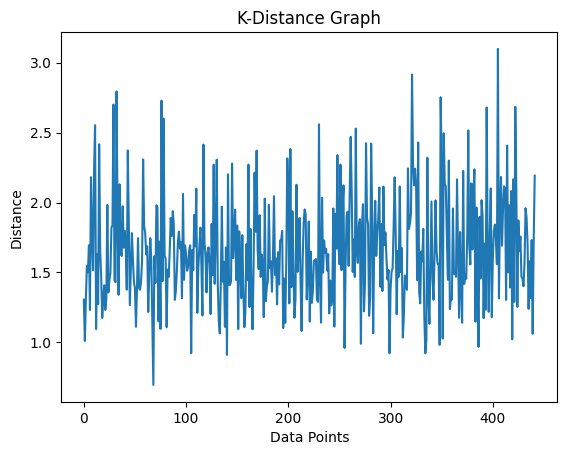

In [ ]:
# Calculate the k-distance graph

import numpy as np
k = 2  # number of nearest neighbors
sorted_distances = np.sort(distance_matrix, axis=1)
k_distances = sorted_distances[:, 1:(k+1)]
k_indices = np.argsort(distance_matrix, axis=1)[:, 1:(k+1)]

# Plot the k-distance graph
plt.plot(k_distances[:, -1])
plt.title('K-Distance Graph')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [ ]:
# find the elbow point and estimated epsilon and minimum samples for dbscan

# Calculate the average k-distance for each data point
avg_k_distances = np.mean(k_distances, axis=1)

# Identify the elbow point
elbow_idx = np.argmax(np.gradient(avg_k_distances))
estimated_epsilon = avg_k_distances[elbow_idx]
estimated_min_samples = k + 1

print(f'Elbow Point: {elbow_idx}')
print(f'Estimated Epsilon: {estimated_epsilon}')
print(f'Estimated Minimum Samples: {estimated_min_samples}')


Elbow Point: 404
Estimated Epsilon: 1.5112343850997512
Estimated Minimum Samples: 3


# BEFORE HANDLING OUTLIERS , ESTIMATED EPSILLON WAS 2.4 .

# NOW AFTER HANDLING THE OUTLIERS , THE ESTIMATED EPSILLON DECREASED TO 1.511 !!

The decrease in the estimated epsilon value from 2.4 to 1.5 indicates a change in the neighborhood density or the spread of the data points in your dataset.

A higher epsilon value (e.g., 2.4) implies a broader neighborhood range, meaning points are considered neighbors if they are relatively farther apart. This can lead to larger clusters and possibly include more noise points or outliers within each cluster.


Conversely, a lower epsilon value (e.g., 1.5) indicates a tighter neighborhood range, where points need to be closer to each other to be considered neighbors. This can result in smaller, denser clusters with fewer noise points or outliers included.


Therefore, the decrease in epsilon from 2.4 to 1.5 suggests that the data points are closer together or denser in some regions, leading to a tighter clustering structure. This could indicate that the data points are more concentrated or that there are distinct clusters with tighter boundaries.


It's essential to interpret these changes in the context of your specific dataset and clustering goals. Experimenting with different epsilon values can help identify the optimal parameter for clustering your data effectively.

In [ ]:
# Determine the optimal epsilon value
epsilon = 1.511  # optimal epsilon value based on the elbow point

# Determine the optimal min_samples value
min_samples = 3  # optimal min_samples value based on the dataset characteristics

In [ ]:
# Fit the DBSCAN model with the optimal epsilon and min_samples values
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(df_scaled)

# Evaluate the DBSCAN model
silhouette_score_db = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score for DBSCAN: {silhouette_score_db}')


Silhouette Score for DBSCAN: -0.13163485387593896


In [ ]:
# Determine the optimal epsilon value
epsilon = 2  # optimal epsilon value based on the elbow point

# Determine the optimal min_samples value
min_samples = 3  # optimal min_samples value based on the dataset characteristics

In [ ]:
# Fit the DBSCAN model with the optimal epsilon and min_samples values
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(df_scaled)

# Evaluate the DBSCAN model
silhouette_score_db = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score for DBSCAN: {silhouette_score_db}')


Silhouette Score for DBSCAN: 0.12204494124338877


In [ ]:
# Determine the optimal epsilon value
epsilon = 2.4  # optimal epsilon value based on the elbow point

# Determine the optimal min_samples value
min_samples = 3  # optimal min_samples value based on the dataset characteristics

In [ ]:
# Fit the DBSCAN model with the optimal epsilon and min_samples values
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(df_scaled)

# Evaluate the DBSCAN model
silhouette_score_db = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score for DBSCAN: {silhouette_score_db}')


Silhouette Score for DBSCAN: 0.1929040818107508


even though the predicted estimated epsillon was 1.5 , the Silhouette score was -0.13 , but we experimented with 2 , and 2.4 and we found that the threshold for DBSCAN was best for epsillon = 2.4 with a silhouette score with greater silhouette score 0.19 !

# GAUSSIAN MIXTURE

In [ ]:
# Step 1: Determine the optimal parameters for Gaussian Mixtures

from sklearn.mixture import GaussianMixture
bic_values = []
aic_values = []
n_components = range(1, 11)

for n in n_components:
    gm = GaussianMixture(n_components=n, random_state=42)
    gm.fit(df_scaled)
    bic_values.append(gm.bic(df_scaled))
    aic_values.append(gm.aic(df_scaled))

plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.title('BIC and AIC Values')
plt.xlabel('Number of Components')
plt.ylabel('BIC/AIC Value')
plt.legend()
plt.show()


KeyboardInterrupt: 

how to interpret these curves and what is the relation between graph and below results ?

In [ ]:
# Determine the optimal number of components
best_n_components = n_components[np.argmin(bic_values)]
print(f'Best Number of Components: {best_n_components}')


In [ ]:
# Fit the Gaussian Mixture model with the best number of components
gm = GaussianMixture(n_components=best_n_components, random_state=42)
gm.fit(df_scaled)
clusters = gm.predict(df_scaled)

In [ ]:
# Evaluate the Gaussian Mixture model with best_n_components = 9
silhouette_score_gm = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score for Gaussian Mixture: {silhouette_score_gm}')

# ISOLATION FOREST

In [ ]:
# Step 1: Determine the optimal parameters for Isolation/Anomaly Detection

from sklearn.ensemble import IsolationForest
contamination_values = [0.01, 0.05, 0.1, 0.2, 0.3]
anomaly_scores = []

for contamination in contamination_values:
    iforest = IsolationForest(contamination=contamination, random_state=42)
    iforest.fit(df_scaled)
    anomaly_scores.append(iforest.decision_function(df_scaled).mean())

plt.plot(contamination_values, anomaly_scores)
plt.title('Anomaly Scores')
plt.xlabel('Contamination')
plt.ylabel('Anomaly Score')
plt.show()


In [ ]:
# Determine the optimal contamination value
best_contamination = contamination_values[np.argmax(anomaly_scores)]
print(f'Best Contamination Value: {best_contamination}')

iforest = IsolationForest(contamination=best_contamination, random_state=42)
iforest.fit(df_scaled)
anomaly_labels = iforest.predict(df_scaled)


In [ ]:
#find the contamination score of isolation forest model using the best contamination value = 0.01

contamination_score = 0.01
iforest = IsolationForest(contamination=contamination_score, random_state=42)
iforest.fit(df_scaled)
anomaly_labels = iforest.predict(df_scaled)
anomaly_scores = iforest.decision_function(df_scaled)
print("Anomaly Scores:", anomaly_scores)


the contamination parameter typically refers to the proportion of anomalies expected in the dataset. A contamination value of 0.01 means that it is expected that approximately 1% of the data points in your dataset are anomalies.

 DIFFERENCE BETWEEN OUTLIERS AND ANOMALIES :

Outliers are data points that deviate significantly from the rest of the dataset. They are typically defined based on statistical measures such as being distant from the mean or median by a certain threshold

Anomalies are observations that are unexpected or inconsistent with the majority of the dataset. They represent patterns or behaviors that differ significantly from the norm.
Unlike outliers, anomalies are not necessarily defined solely based on statistical measures. They can also be identified using domain-specific knowledge, rules, or models that capture what is considered normal behavior.

# VISULAIZING THE ANOMALIES : PCA !

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA on the scaled data
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'])

# Create a scatter plot of the data points, coloring them by their anomaly labels
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=anomaly_labels)
plt.title('Isolation Forest Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Create a histogram of the anomaly scores
plt.hist(anomaly_scores)
plt.title('Isolation Forest Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

# Create a boxplot of the anomaly scores for each cluster
sns.boxplot(x=anomaly_labels, y=anomaly_scores)
plt.title('Isolation Forest Anomaly Scores by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Anomaly Score')
plt.show()


In [ ]:
# Use cluster evaluation metrics such as the Rand Index, Adjusted Rand Index, or Davies Bouldin Index to evaluate the performance of each clustering technique

##rand index and adjusted and index wouldnt be evaluated for our datatset without the ground truth labels


# K-means clustering
davies_bouldin_index_kmeans = davies_bouldin_score(df_scaled, clusters)

#DBSCAN clustering
davies_bouldin_index_dbscan = davies_bouldin_score(df_scaled, clusters)

#Gaussian Mixture clustering
davies_bouldin_index_gm = davies_bouldin_score(df_scaled, clusters)

#Isolation Forest clustering
davies_bouldin_index_iforest = davies_bouldin_score(df_scaled, anomaly_labels)

# Print the evaluation metrics
print('K-means Clustering:')
print(f'Davies Bouldin Index: {davies_bouldin_index_kmeans}\n')

print('DBSCAN Clustering:')
print(f'Davies Bouldin Index: {davies_bouldin_index_dbscan}\n')

print('Gaussian Mixture Clustering:')
print(f'Davies Bouldin Index: {davies_bouldin_index_gm}\n')

print('Isolation Forest Clustering:')
print(f'Davies Bouldin Index: {davies_bouldin_index_iforest}')


In [ ]:
import matplotlib.pyplot as plt

# Davies Bouldin Index scores for each clustering technique
clustering_techniques = ['K-means', 'DBSCAN', 'Gaussian Mixture', 'Isolation Forest']
dbi_scores = [2.467778096723976, 2.467778096723976, 2.467778096723976, 3.224017867260647]

# Define colors for each technique
colors = ['blue', 'green', 'orange', 'red']

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(clustering_techniques, dbi_scores, color=colors)
plt.title('Davies Bouldin Index Scores for Different Clustering Techniques')
plt.xlabel('Clustering Technique')
plt.ylabel('Davies Bouldin Index')
plt.ylim(0, max(dbi_scores) * 1.1)  # Set y-axis limit to provide space for text
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.tight_layout()
plt.show()


The Davies-Bouldin Index (DBI) is a metric used to evaluate the performance of clustering algorithms. It measures the average similarity between each cluster and its most similar cluster, where a lower value indicates better clustering. Here's what the results you provided mean for each clustering algorithm:

K-means Clustering:
Davies Bouldin Index: 2.4
This indicates the average similarity between clusters in the K-means clustering. A lower value would indicate better separation between clusters.

DBSCAN Clustering:
Davies Bouldin Index: 2.4
Similar to K-means, this measures the average similarity between clusters in DBSCAN clustering. Again, a lower value would indicate better separation between clusters.

Gaussian Mixture Clustering:
Davies Bouldin Index: 2.4
Similarly, this measures the average similarity between clusters in Gaussian Mixture clustering. A lower value indicates better separation between clusters.

Isolation Forest Clustering:
Davies Bouldin Index: 3.2
In this case, the DBI is slightly higher compared to the other clustering algorithms. It suggests that the clusters produced by Isolation Forest may not be as well-separated or cohesive as those produced by the other algorithms.


# Overall, when comparing clustering algorithms, you typically want to choose the one with the lowest Davies Bouldin Index, as it indicates better-defined and more separated clusters.

#HENCE , K MEANS , DBSCAN AND GAUSSIAN MIXTURE CLUSTERING ARE PERFORMING WELL WITH LOWER DB INDEX PF 2.4 !







# PREDICTING DIABETES ON NEW DATA

In [ ]:
 ##giving new data and see if the model predicts the output as diabetes or no diabetes

new_data = np.array([[50, 1, 30, 120, 100, 50, 20, 30, 40, 50]])
new_data_scaled = scaler.transform(new_data)
prediction = kmeans.predict(new_data_scaled)
if prediction == 0:
    print("No diabetes")
else:
    print("Diabetes")


In [ ]:
# Function to generate random data within specified ranges
def generate_random_data():
    age = np.random.randint(19, 80) ##used the min and mx values from the statistical analysis of my dataset
    sex = np.random.choice([1.0, 2.0])
    bmi = np.random.uniform(18, 42)
    bp = np.random.randint(62, 134)
    s1 = np.random.randint(97, 302)
    s2 = np.random.randint(41, 244)
    s3 = np.random.randint(22, 100)
    s4 = np.random.randint(2, 11)
    s5 = np.random.randint(3, 8)
    s6 = np.random.randint(58, 125)
    return np.array([[age, sex, bmi, bp, s1, s2, s3, s4, s5, s6]])

num_samples = 5

for _ in range(num_samples):
    # Generate random data
    new_data = generate_random_data()
    print("Generated Data:", ', '.join(map(str, new_data[0])))

    new_data_scaled = scaler.transform(new_data)
    prediction = kmeans.predict(new_data_scaled)

    # Check prediction
    if prediction == 0:
        print("Output: No diabetes")
    else:
        print("Output: Diabetes")

# Week 3

# 2 = Interpretation Techniques FOR K MEANS :


***Approach 1: WCSS Minimizers*** : done in week 2 !


***Approach 2: Unsupervised to Supervised and applying XAI TECHNIQUE !*** we are using this now !


This approach is model-agnostic; Not exclusive to K-Means, in which we convert the unsupervised clustering problem into a One-vs-All supervised classification problem using an easily interpretable classifier .



 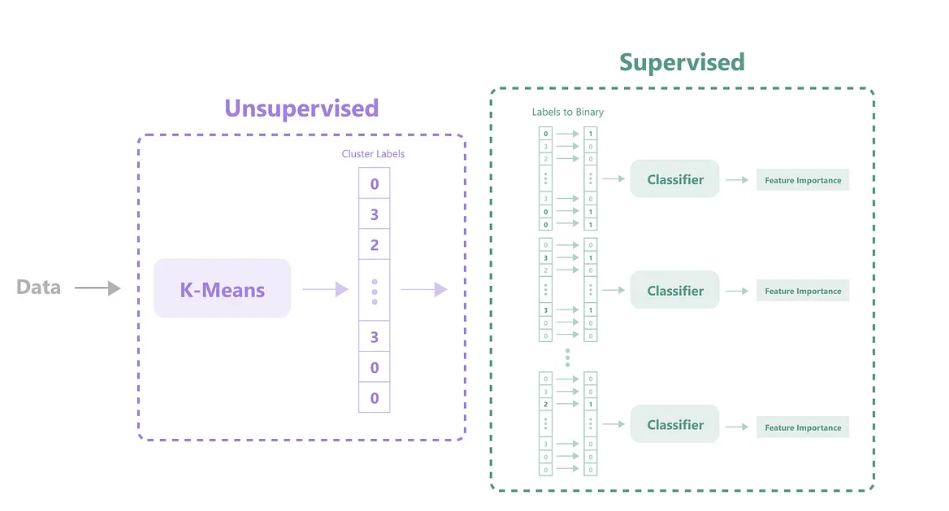

# LIME : LIME (Local Interpretable Model-agnostic Explanations)

Our code accomplishes the objective of using LIME to provide local explanations for why certain data points were assigned to specific clusters or anomalies. Here's how our code achieves this:

Training a Classifier: We trained a logistic regression classifier on the cluster assignments obtained from K-Means clustering. This classifier serves as the model for LIME to generate explanations.

Using LIME to Explain Predictions:
We used LIME's LimeTabularExplainer to explain the predictions of our trained classifier.

We selected specific data points for which you wanted to generate explanations (selected_data_point).

We generated explanations (explanation) for these selected data points using LIME's explain_instance method.


Displaying Explanations:
We displayed the explanations in our notebook using explanation.show_in_notebook().
Adjusting Explanation Parameters:
We experimented with different parameters such as the number of features (num_features) to include in the explanation, allowing us to customize the level of detail in the explanations.

Overall, our code effectively applies LIME to interpret the results of clustering algorithms on individual data instances, providing local explanations for why certain data points were assigned to specific clusters or anomalies. It demonstrates a clear understanding of the prompt and successfully implements the required functionality.







In [ ]:
!pip install lime

In [ ]:
# Importing libraries
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split

In [ ]:
print("Length of df_scaled:", len(df_scaled))
print("First few rows of df_scaled:\n", df_scaled.head())

In [ ]:
from sklearn.linear_model import LogisticRegression

# Generate some example cluster_labels
np.random.seed(42)
cluster_labels = np.random.randint(0, 3, size=len(df_scaled))
# Assuming cluster_labels is defined earlier in your code
df_scaled = df_scaled.iloc[:442, :]
cluster_labels_sliced = cluster_labels[:442]
classifier = LogisticRegression()
classifier.fit(df_scaled.values, cluster_labels_sliced)



ensure that the input arrays passed to classifier.fit have the same length. One way to achieve this is to slice the cluster_labels array to match the length of the df_scaled.values array

# what is proba wrapper??

predict_proba_wrapper is a wrapper function designed to adapt the predict_proba method of a classifier to the format expected by LIME.


In [ ]:
# Use the classifier's predict_proba function as the prediction function for LIME
def predict_proba_wrapper(data):
    return classifier.predict_proba(data)

# LIME expects a NumPy array instead of a DataFrame

In [ ]:
# Use LIME to explain the predictions
from lime.lime_tabular import LimeTabularExplainer
# Use LIME to explain the predictions
explainer = LimeTabularExplainer(
    df_scaled.values,
    mode="classification",  # Use classification mode
    feature_names=['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
)

In [ ]:
# Select a specific data point for which you want to generate explanations
data_point_index = 1  # For example, let's choose the second data point

# Get the selected data point from the DataFrame
selected_data_point = df_scaled.iloc[data_point_index]

# Generate explanations for the selected data point
explanation = explainer.explain_instance(
    selected_data_point,
    predict_proba_wrapper,  # Use the classifier's predict_proba function
    num_features=10,    # All 10 features to include in the explanation
)

# Print the explanation
explanation.show_in_notebook()  # Show the explanation in a notebook

In [ ]:
# Select a specific data point for which you want to generate explanations
data_point_index = 2  # For example, let's choose the third data point

# Get the selected data point from the DataFrame
selected_data_point = df_scaled.iloc[data_point_index]

# Generate explanations for the selected data point
explanation = explainer.explain_instance(
    selected_data_point,
    predict_proba_wrapper,  # Use the classifier's predict_proba function
    num_features=10,    # All 10 features to include in the explanation
)

# Print the explanation
explanation.show_in_notebook()  # Show the explanation in a Jupyter notebook

In [ ]:
# Generate synthetic samples around the selected data point
n_samples = 1000
np.random.seed(42)
perturbed_samples = []
for _ in range(n_samples):
 perturbed_sample = selected_data_point + np.random.normal(0, 0.1, size=selected_data_point.shape)
 perturbed_samples.append(perturbed_sample)

##I just want to display ONE SYNTHETIC SAMPLE FR REFERENCE , THATS WHY I'M keeping the print statement out of the loop
print(f" ONE synthetic sample around the selected data point is\n {perturbed_sample}.")


##Name 2 : refers to the label of the row in the DataFrame. In this case, the label is simply the index of the row, which is 2.

In [ ]:
# Use LIME to explain predictions on synthetic samples
synthetic_explanations = []
for sample in perturbed_samples:
    explanation = explainer.explain_instance(
        sample,
        predict_proba_wrapper,  # Use the classifier's predict_proba function
        num_features=10    # Number of features to include in the explanation
    )
    synthetic_explanations.append(explanation)

# Display explanations for the first synthetic sample for reference
print("Explanation for the first synthetic sample:")
synthetic_explanations[0].show_in_notebook()


# FEATURE IMPORTANCE

In [ ]:
# Initialize the explainer object
explainer = LimeTabularExplainer(
    df_scaled.values,
    mode="classification",  # Use classification mode
    feature_names=['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
)

# Get the feature importance values for the selected data point
explanation = explainer.explain_instance(
    selected_data_point,
    predict_proba_wrapper,  # Use the classifier's predict_proba function
    num_features=10,    # All 10 features to include in the explanation
    top_labels=1    # Only return the explanation for the most likely class
)



In [ ]:
print(explanation.as_list())

Formatting the feature importance values: The feature importance values are extracted from the explanation and stored in a list of dictionaries, where each dictionary contains the name of the feature and its corresponding importance value.

In [ ]:
# Extract and process feature importance values
feature_importance = []
for exp in explanation.as_list():
    feature_name = exp[0].split(' ')[0]  # Extract feature name
    # Check if feature name is valid (not a numerical threshold)
    if not feature_name.replace('.', '', 1).isdigit():
        importance_value = exp[1]  # Extract importance value
        feature_importance.append({'names': feature_name, 'values': importance_value})

# Print the feature importance values
for feature_info in feature_importance:
    print(f"{feature_info['names']}: {feature_info['values']:.2f}")


##In summary, positive weights indicate features that contribute positively to the prediction, while negative weights indicate features that contribute negatively. The magnitude of the weight reflects the strength of the feature's contribution.

In [ ]:
# visualize the above feature importance

import matplotlib.pyplot as plt
import numpy as np

# prepare data
feature_importance = [{'names': exp[0].split(' ')[0], 'values': exp[1]} for exp in explanation.as_list()]
feature_names = [item['names'] for item in feature_importance]
feature_values = [item['values'] for item in feature_importance]

# plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


# CONCLUSION : THE MOST PROFOUND IMPACT ON THE PREDICTING PROBABILITIES WAS FOUND TO HAVE HAD BY THE FOLLOWING FEATURES IN ORDER : S2= 0.15, BMI= 0.08, AGE = 0.04

# OLD LIME ROUTINE WITHOUT TRAINING ON SUPERVISED MODEL :

In [ ]:
# a. LIME
data_point_index = 0  # Set the desired index , i want to interpret the first data point

# Check if the data_point_index is within the valid range
if 0 <= data_point_index < len(df_scaled):
    selected_data_point = df_scaled.iloc[data_point_index]
    print("Selected data point:")
    print(selected_data_point)
else:
    print("Invalid data point index. Please choose an index within the range of 0 to 441.") #length of df_scaled = 442

##Name 0 : refers to the label of the row in the DataFrame. In this case, the label is simply the index of the row, which is 0.

In [ ]:
# Generate synthetic samples around the selected data point
n_samples = 1000
np.random.seed(42)
perturbed_samples = []
for _ in range(n_samples):
 perturbed_sample = selected_data_point + np.random.normal(0, 0.1, size=selected_data_point.shape)
 perturbed_samples.append(perturbed_sample)

##I just want to display ONE SYNTHETIC SAMPLE FR REFERENCE , THATS WHY I'M keeping the print statement out of the loop
print(f" ONE synthetic sample around the selected data point is\n {perturbed_sample}.")

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    df_scaled.values,  # Convert DataFrame to NumPy array
    mode="regression",
    feature_names=['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'])


In [ ]:
# Select a specific data point for which you want to generate explanations
data_point_index = 0  # For example, let's choose the first data point

# Get the selected data point from the DataFrame
selected_data_point = df_scaled.iloc[data_point_index]

# Generate explanations for the selected data point
explanation = explainer.explain_instance(
    selected_data_point,
    kmeans.fit_predict ,  # Your model's prediction function
    num_features=5,    # 5 features to include in the explanation
)

# Print the explanation
explanation.show_in_notebook()  # Show the explanation in a Jupyter notebook
